In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [2]:
df = pd.read_csv('/content/ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
df.shape

(17966, 9)

In [4]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [5]:
# Show frequency count of each car model
print("🔢 Car Model Frequency:\n")
print(df['model'].value_counts())

# Show all unique car models
print("\n📋 Unique Car Models:\n")
print(df['model'].unique())


🔢 Car Model Frequency:

model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64

📋 Unique Car Models:

[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Musta

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [9]:
# splitting numerical and catagorical
categorical_columns = ["model", "transmission", "fuelType"]
numerical_columns = ["year", "mileage", "tax", "mpg", "engineSize"]

In [10]:
  # Drop missing values if any
df.dropna(inplace=True)

# Convert categorical to numeric
df = pd.get_dummies(df, drop_first=True)


In [11]:
X = df.drop('price', axis=1)  # All features
y = df['price']               # Target variable


In [12]:
df.head()

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2018,14000,9083,150,57.7,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,13000,12456,150,57.7,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,17500,10460,145,40.3,1.5,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,2019,16500,1482,145,48.7,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          17966 non-null  int64  
 1   price                         17966 non-null  int64  
 2   mileage                       17966 non-null  int64  
 3   tax                           17966 non-null  int64  
 4   mpg                           17966 non-null  float64
 5   engineSize                    17966 non-null  float64
 6   model_ C-MAX                  17966 non-null  bool   
 7   model_ EcoSport               17966 non-null  bool   
 8   model_ Edge                   17966 non-null  bool   
 9   model_ Escort                 17966 non-null  bool   
 10  model_ Fiesta                 17966 non-null  bool   
 11  model_ Focus                  17966 non-null  bool   
 12  model_ Fusion                 17966 non-null  bool   
 13  m

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.9292959018084328
MAE: 863.8321612707687


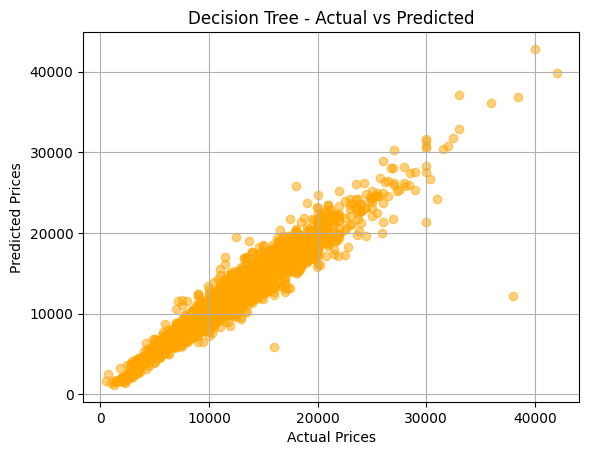

In [17]:
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree - Actual vs Predicted")
plt.grid(True)
plt.show()


In [18]:
import joblib

# Assuming `model` is your trained RandomForestRegressor
joblib.dump(model, 'car_price_model.pkl')


['car_price_model.pkl']

In [19]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [28]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

st.set_page_config(page_title="Car Price Prediction", layout="centered")
st.title("🚗 Car Price Prediction App")
st.write("Enter car details below to predict the estimated selling price.")

# Load the trained model
try:
    model = joblib.load("car_price_model.pkl")
except FileNotFoundError:
    st.error("Model file not found. Please ensure 'car_price_model.pkl' is in the same folder.")
    st.stop()

# User Inputs
year = st.number_input("Year", min_value=2000, max_value=2024, value=2018)
mileage = st.number_input("Mileage (in km)", min_value=0, max_value=300000, value=50000)
engine_size = st.slider("Engine Size (L)", min_value=0.6, max_value=5.0, step=0.1, value=1.6)
mpg = st.number_input("Miles Per Gallon (MPG)", min_value=0.0, max_value=150.0, value=50.0)
tax = st.number_input("Tax (in £)", min_value=0, max_value=600, value=150)

# Dropdowns for categorical variables
model_input = st.selectbox("Car Model", ['Fiesta', 'Focus', 'Kuga'])
fuel_type = st.selectbox("Fuel Type", ['Petrol', 'Diesel', 'Hybrid'])
transmission = st.selectbox("Transmission", ['Manual', 'Automatic', 'Semi-Auto'])

# Prepare input for prediction
input_dict = {
    'year': year,
    'mileage': mileage,
    'tax': tax,
    'mpg': mpg,
    'engineSize': engine_size,
    f'model_{model_input}': 1,
    f'transmission_{transmission}': 1,
    f'fuelType_{fuel_type}': 1
}

# Add missing columns as 0 based on trained model columns
input_df = pd.DataFrame([input_dict])
for col in model.feature_names_in_:
    if col not in input_df.columns:
        input_df[col] = 0
input_df = input_df[model.feature_names_in_]

# Predict button
if st.button("Predict Price"):
    prediction = model.predict(input_df)[0]
    st.success(f"💰 Estimated Car Price: £{int(prediction):,}")

2025-06-25 10:02:22.124 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 10:02:22.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 10:02:22.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 10:02:22.129 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 10:02:22.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 10:02:22.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 10:02:22.133 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 10:02:22.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [27]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.69.214.155:8501

  Stopping...
  Stopping...
